# Independence Checking

This notebook explains independence in logic and how this project checks for independence using pattern enumeration.

## Learning Objectives

By the end of this notebook, you will understand:
- What independence means
- Why independence is harder than completeness
- Composition depth and bounded checking
- Pattern enumeration approach
- Examples of dependent vs independent sets

In [1]:
# Setup Python path to find the src module
import sys
from pathlib import Path

# Add project root to Python path
project_root = Path.cwd().parent
if str(project_root) not in sys.path:
    sys.path.insert(0, str(project_root))

print(f"✓ Project root added to path: {project_root}")

✓ Project root added to path: /home/benjamin/Documents/Philosophy/Projects/Z3/nice_connectives


## 0. Python Path Setup

First, let's ensure Python can find the project modules:

In [2]:
# Setup
from src.connectives import Connective
from src.constants import AND, OR, XOR, NOT, NAND, TRUE, FALSE
from src.independence import is_independent
from notebooks.utils import display_truth_table, compare_connectives

import matplotlib.pyplot as plt
%matplotlib inline

print("✓ Setup complete")

✓ Setup complete


## 1. What is Independence?

A set of connectives is **independent** if no connective in the set can be **defined** from the other connectives.

### Example: Dependent Set

{AND, OR, NOT, NAND} is **dependent** because:
- NAND(x,y) = NOT(AND(x,y))

NAND is definable from the other three, so the set is not independent.

### Example: Independent Set

{AND, OR, NOT} is **independent** - none of these can be defined from the other two.

## 2. Why Independence is Hard

Unlike completeness (which has Post's O(n) theorem), checking independence requires:
1. For each connective C in the set
2. Try to compose the remaining connectives
3. Check if any composition equals C

This is potentially **exponential** in complexity!

### The Solution: Bounded Composition

Instead of checking all possible compositions (infinite!), we check up to a **bounded depth**.

This project uses **depth 3**, which is sufficient for most practical cases.

## 3. Composition Depth

**Depth 0**: The original connectives themselves

**Depth 1**: Applying one connective to the inputs
- Example: AND(x, y)

**Depth 2**: Applying connectives to depth-1 results
- Example: OR(AND(x,y), NOT(x))

**Depth 3**: Applying connectives to depth-2 results  
- Example: AND(OR(x,y), NOT(AND(x,y)))

## 4. Pattern Enumeration

The project uses **pattern enumeration** - explicitly listing composition patterns up to depth 3:

### Binary Patterns
- f(x, y) - Direct application
- f(g(x,y), y) - Compose with first arg
- f(x, g(x,y)) - Compose with second arg
- f(g(x,y), h(x,y)) - Compose both args
- ...many more!

### Ternary Patterns
- f(x, y, z) - Direct application
- u(f(x,y,z)) - Unary wrapper
- f(g(x,y), z, w) - Partial composition
- ...even more!

## 5. Example: Dependent Set

Let's verify that {AND, NOT, NAND} is dependent:

In [3]:
# Check independence of {AND, NOT, NAND}
set1 = [AND, NOT, NAND]

result = is_independent(set1, max_depth=3)
print(f"Is {{AND, NOT, NAND}} independent? {result}")
print()

if not result:
    print("Dependent! NAND can be defined:")
    print("  NAND(x,y) = NOT(AND(x,y))")
    print()
    print("Verification:")
    for x in [0, 1]:
        for y in [0, 1]:
            nand_direct = NAND.evaluate(x, y)
            nand_composed = NOT.evaluate(AND.evaluate(x, y))
            match = "✓" if nand_direct == nand_composed else "✗"
            print(f"  NAND({x},{y})={nand_direct}, NOT(AND({x},{y}))={nand_composed} {match}")

Is {AND, NOT, NAND} independent? False

Dependent! NAND can be defined:
  NAND(x,y) = NOT(AND(x,y))

Verification:
  NAND(0,0)=1, NOT(AND(0,0))=1 ✓
  NAND(0,1)=1, NOT(AND(0,1))=1 ✓
  NAND(1,0)=1, NOT(AND(1,0))=1 ✓
  NAND(1,1)=0, NOT(AND(1,1))=0 ✓


## 6. Example: Independent Set

Let's verify that {AND, XOR, TRUE} is independent:

In [4]:
# Check independence of {AND, XOR, TRUE}
set2 = [AND, XOR, TRUE]

result = is_independent(set2, max_depth=3)
print(f"Is {{AND, XOR, TRUE}} independent? {result}")
print()

if result:
    print("Independent! None of these can be defined from the others.")
    print()
    print("Why?")
    print("  - TRUE is nullary (constant), cannot be composed from binary functions")
    print("  - AND and XOR have different algebraic properties")
    print("  - No depth-3 composition of {XOR, TRUE} equals AND")
    print("  - No depth-3 composition of {AND, TRUE} equals XOR")

Is {AND, XOR, TRUE} independent? True

Independent! None of these can be defined from the others.

Why?
  - TRUE is nullary (constant), cannot be composed from binary functions
  - AND and XOR have different algebraic properties
  - No depth-3 composition of {XOR, TRUE} equals AND
  - No depth-3 composition of {AND, TRUE} equals XOR


## 7. Visualizing Dependence

Let's see the relationship between AND and NAND:

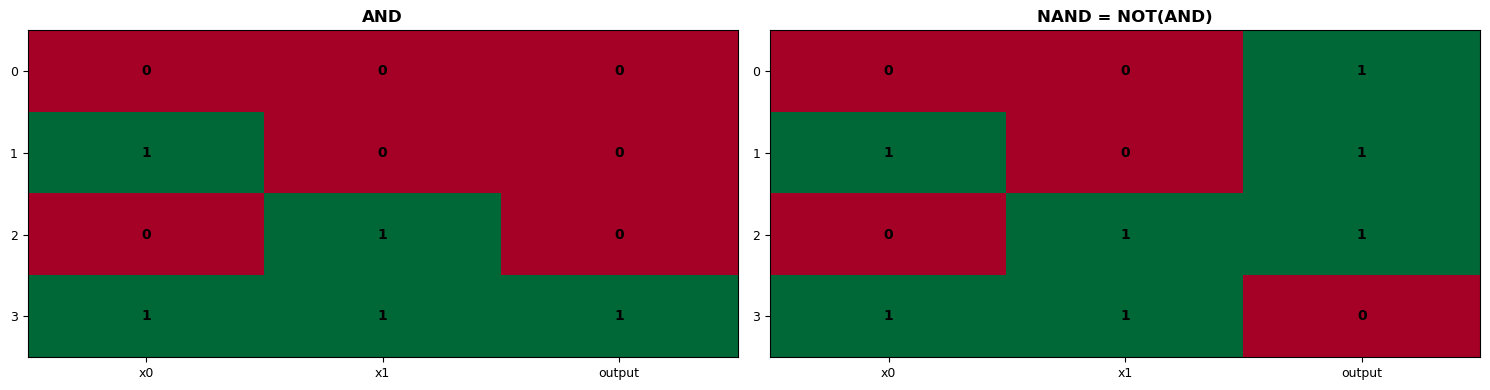


Notice: NAND outputs are exactly the opposite of AND.
This is because NAND = NOT(AND).


In [5]:
# Compare AND and NAND
fig = compare_connectives([AND, NAND], titles=["AND", "NAND = NOT(AND)"])
plt.show()

print("\nNotice: NAND outputs are exactly the opposite of AND.")
print("This is because NAND = NOT(AND).")

## 8. Testing Independence with Different Sets

Let's test several sets:

In [6]:
# Test multiple sets
test_sets = [
    ([AND, OR], "AND, OR"),
    ([AND, OR, NOT], "AND, OR, NOT"),
    ([XOR, AND], "XOR, AND"),
    ([NAND], "NAND"),
    ([TRUE, FALSE], "TRUE, FALSE"),
]

print("Independence Tests:")
print()

for conn_set, name in test_sets:
    result = is_independent(conn_set, max_depth=3)
    status = "✓ Independent" if result else "✗ Dependent"
    print(f"{name:20} → {status}")

Independence Tests:

AND, OR              → ✓ Independent
AND, OR, NOT         → ✗ Dependent
XOR, AND             → ✓ Independent
NAND                 → ✓ Independent
TRUE, FALSE          → ✓ Independent


## 9. Why {TRUE, FALSE} is Dependent

TRUE and FALSE are both constants. Let's see why they're dependent:

In [7]:
# Show why {TRUE, FALSE} is dependent
print("Truth tables:")
print()
print("TRUE:")
print(display_truth_table(TRUE))
print()
print("FALSE:")
print(display_truth_table(FALSE))
print()
print("Both are constants (arity 0).")
print("FALSE = NOT(TRUE) if NOT were available.")
print("But even without NOT, one constant is sufficient -")
print("you don't need both in a minimal set.")

Truth tables:

TRUE:
   output
0       1

FALSE:
   output
0       0

Both are constants (arity 0).
FALSE = NOT(TRUE) if NOT were available.
But even without NOT, one constant is sufficient -
you don't need both in a minimal set.


## 10. The Nice Set Property

A set is **nice** if it is both:
1. **Complete** (can define all connectives)
2. **Independent** (no connective is definable from others)

Let's check if {XOR, AND, TRUE} is nice:

In [8]:
# Check if {XOR, AND, TRUE} is nice
from src.post_classes import is_complete

candidate_set = [XOR, AND, TRUE]

complete = is_complete(candidate_set)
independent = is_independent(candidate_set, max_depth=3)

print(f"Set: {{XOR, AND, TRUE}}")
print(f"  Complete? {complete}")
print(f"  Independent? {independent}")
print()

if complete and independent:
    print("✓ This is a NICE SET of size 3!")
else:
    print("✗ Not a nice set.")
    if not complete:
        print("  Reason: Not complete")
    if not independent:
        print("  Reason: Not independent")

Set: {XOR, AND, TRUE}
  Complete? True
  Independent? True

✓ This is a NICE SET of size 3!


## 11. Interactive Exercise

Try creating your own sets and testing them:

In [9]:
# Your turn! Test your own set
# Uncomment and modify:

# my_set = [AND, OR, XOR]
# complete = is_complete(my_set)
# independent = is_independent(my_set, max_depth=3)
# print(f"Complete: {complete}, Independent: {independent}")
# if complete and independent:
#     print("Nice set!")

## 12. Depth Limitations

Important: Independence checking at depth 3 is **sufficient but not necessary**.

- If depth-3 checking says **independent** → definitely independent
- If depth-3 checking says **dependent** → might require deeper composition

In practice, depth 3 catches almost all dependencies!

## Summary

In this notebook, you learned:
- ✓ What independence means
- ✓ Why independence is harder than completeness
- ✓ Composition depth and bounded checking
- ✓ Pattern enumeration approach (depth 3)
- ✓ Examples of dependent vs independent sets
- ✓ The "nice set" property = complete + independent

## Key Insights

1. **Completeness is easy to check** (O(n) via Post's theorem)
2. **Independence is harder** (requires composition search)
3. **Bounded depth checking** (depth 3) is practical and effective
4. **Nice sets** are rare - finding large ones is challenging!

## Next Steps

- **05_search_binary.ipynb** - Search for nice sets (binary connectives)
- **06_search_ternary.ipynb** - Search with ternary connectives
- **[Results](../docs/RESULTS.md)** - See current research findings (size-35!)